## Installing the necessary libraries

Spacy for natural language processing.

cosine_similarity from sklearn.metrics.pairwise to calculate the cosine similarity between vectors.

KMeans from sklearn.cluster to perform clustering using the K-means algorithm.

networkx for creating and manipulating graphs.

matplotlib.pyplot for visualization.

In [1]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
import json

file_path = '/gdrive/My Drive/Assignment5/News.json'  # Replace with your actual file name
data_list = []

with open(file_path, 'r') as file:
    for line in file:
        data = json.loads(line)
        data_list.append(data)

Link (link):
    A URL pointing to the location of the news article on the web.

Headline (headline):
    The main title or heading of the news article, summarizing its content.

Category (category):
    The classification or topic category to which the news article belongs (e.g., "WORLD NEWS," "POLITICS," "ENTERTAINMENT").

Short Description (short_description):
    A brief summary or excerpt providing additional information about the news article.

Authors (authors):
    The names of the authors or contributors who wrote the news article.

Date (date):
    The publication date of the news article, indicating when it was released.

In [4]:
data_list

[{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9',
  'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters',
  'category': 'U.S. NEWS',
  'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
  'authors': 'Carla K. Johnson, AP',
  'date': '2022-09-23'},
 {'link': 'https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe',
  'headline': 'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video',
  'category': 'U.S. NEWS',
  'short_description': "He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",
  'authors': 'Mary Papenfuss',
  'date': '2022-09-23'},
 {'link': 'https

In [5]:
data_list[:5]

[{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9',
  'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters',
  'category': 'U.S. NEWS',
  'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
  'authors': 'Carla K. Johnson, AP',
  'date': '2022-09-23'},
 {'link': 'https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe',
  'headline': 'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video',
  'category': 'U.S. NEWS',
  'short_description': "He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",
  'authors': 'Mary Papenfuss',
  'date': '2022-09-23'},
 {'link': 'https

In [6]:
!pip install py2neo

Extract Texts:
We combine the text from the "headline" and "short_description" fields of each news article in the dataset. This concatenation creates a comprehensive text representation for each article.

Vector Embeddings:
We use spaCy, a natural language processing library, to obtain vector embeddings for each combined text. The nlp(text).vector call generates a numerical vector representation for the text.

Cosine Similarity Calculation:
We employ scikit-learn's cosine_similarity function to calculate the cosine similarity between all pairs of articles based on their vector embeddings.

Thresholding and Display:
We set a threshold for cosine similarity 0.7 and iterates through the pairs of articles. If the cosine similarity between a pair exceeds the threshold, it prints information about those similar articles.

In [12]:

# Extract text from headlines and short_description
texts = [article['headline'] + ' ' + article['short_description'] for article in data_list[:100]]

# Use spaCy to get vector embeddings
vectors = [nlp(text).vector for text in texts]

# Use scikit-learn to compute cosine similarity
cosine_similarities = cosine_similarity(vectors, vectors)

# Set a threshold for similarity
threshold = 0.7

# Display similar articles
for i in range(len(data_list[:100])):
    for j in range(i + 1, len(data_list[:100])):
        if cosine_similarities[i, j] > threshold:
            print(f"Similar Articles: {data_list[i]['headline']} | {data_list[j]['headline']}")
            print(f"Cosine Similarity: {cosine_similarities[i, j]}")
            print("-" * 30)

Streaming output truncated to the last 5000 lines.
Cosine Similarity: 0.8233779072761536
------------------------------
Similar Articles: Virginia Thomas Agrees To Interview With Jan. 6 Panel | Podcasters Offer $100K Reward For Information On 2Pac’s Killers
Cosine Similarity: 0.7388564348220825
------------------------------
Similar Articles: Virginia Thomas Agrees To Interview With Jan. 6 Panel | Cardi B Donates $100,000 To Her Old Middle School In The Bronx
Cosine Similarity: 0.8440914154052734
------------------------------
Similar Articles: Virginia Thomas Agrees To Interview With Jan. 6 Panel | Bill Richardson Visits Moscow As Brittney Griner, Paul Whelan Remain Jailed
Cosine Similarity: 0.8671060800552368
------------------------------
Similar Articles: Virginia Thomas Agrees To Interview With Jan. 6 Panel | Emmy Awards Viewership Dips To A Record-Low As Its Audience Continues To Drop
Cosine Similarity: 0.7142202854156494
------------------------------
Similar Articles: Virginia 

Create a Network Graph:
Initialize an empty undirected graph using NetworkX.

Add Nodes:
For each news article in the dataset (here, the first 20 articles), add a node to the graph.
The node is labeled with the article's headline.

Add Edges Based on Cosine Similarity:
Iterate through pairs of articles (i, j) and add an edge between them if the cosine similarity between their vector embeddings is above the specified threshold.

Visualize the Graph:
Use the spring layout algorithm to position nodes in 2D space.
Create a figure with a specified size.
Draw nodes and labels, specifying node color, size, and font size.
Draw edges and edge labels, adjusting edge width based on similarity weight.

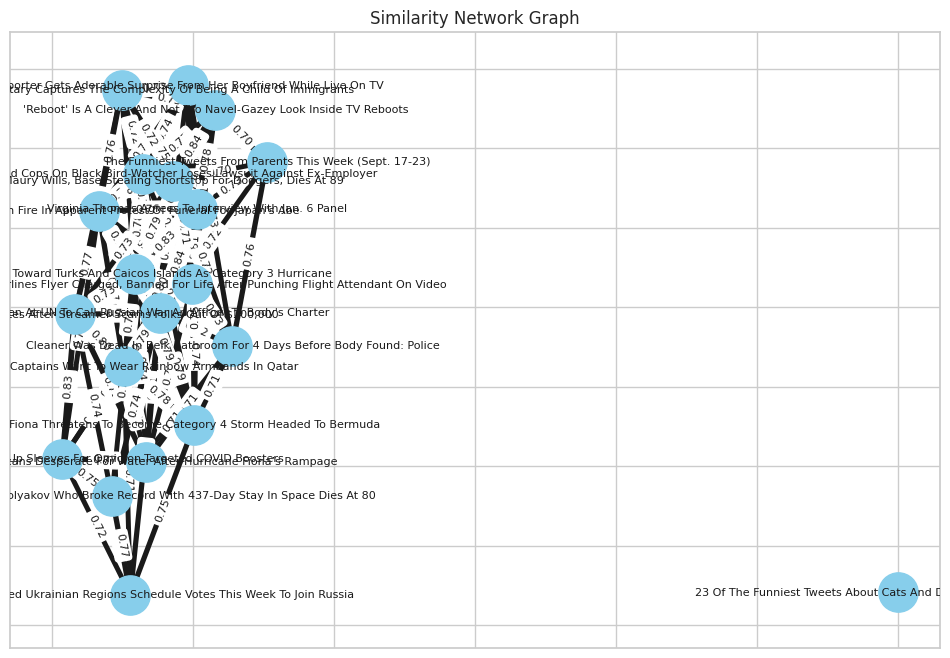

In [37]:

# Create a network graph
G = nx.Graph()

# Add nodes to the graph
for i, article in enumerate(data_list[:20]):
    G.add_node(i, label=article['headline'])

# Add edges based on cosine similarity
for i in range(len(data_list[:100])):
    for j in range(i + 1, len(data_list[:20])):
        similarity = cosine_similarities[i, j]
        if similarity > threshold:
            G.add_edge(i, j, weight=similarity)

# Visualize the network graph
pos = nx.spring_layout(G)
edge_labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}

plt.figure(figsize=(12, 8))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue')
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=8)

# Draw edges and edge labels
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=[G[i][j]['weight'] * 5 for i, j in G.edges()])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Similarity Network Graph")
plt.show()

Combine Headline and Short Description:
Create a DataFrame (data_df) containing the first 20 articles from the dataset.
Combine the 'headline' and 'short_description' columns into a new column called 'text'

TF-IDF Vectorization:
Use the TF-IDF vectorizer to convert the 'text' data into a matrix of TF-IDF features.
The stop_words parameter is set to 'english' to remove common English stop words.

Apply K-Means Clustering:
Set the number of clusters (num_clusters) to 5.
Apply the K-Means algorithm to the TF-IDF matrix, assigning each article to a cluster.

Visualize the Clusters:
Used Seaborn to create a scatter plot to visualize the clusters.
The x-axis represents 'headline', the y-axis represents 'short_description', and the hue represents the assigned cluster.
The plot is styled with a white grid, and the color palette is set to 'viridis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


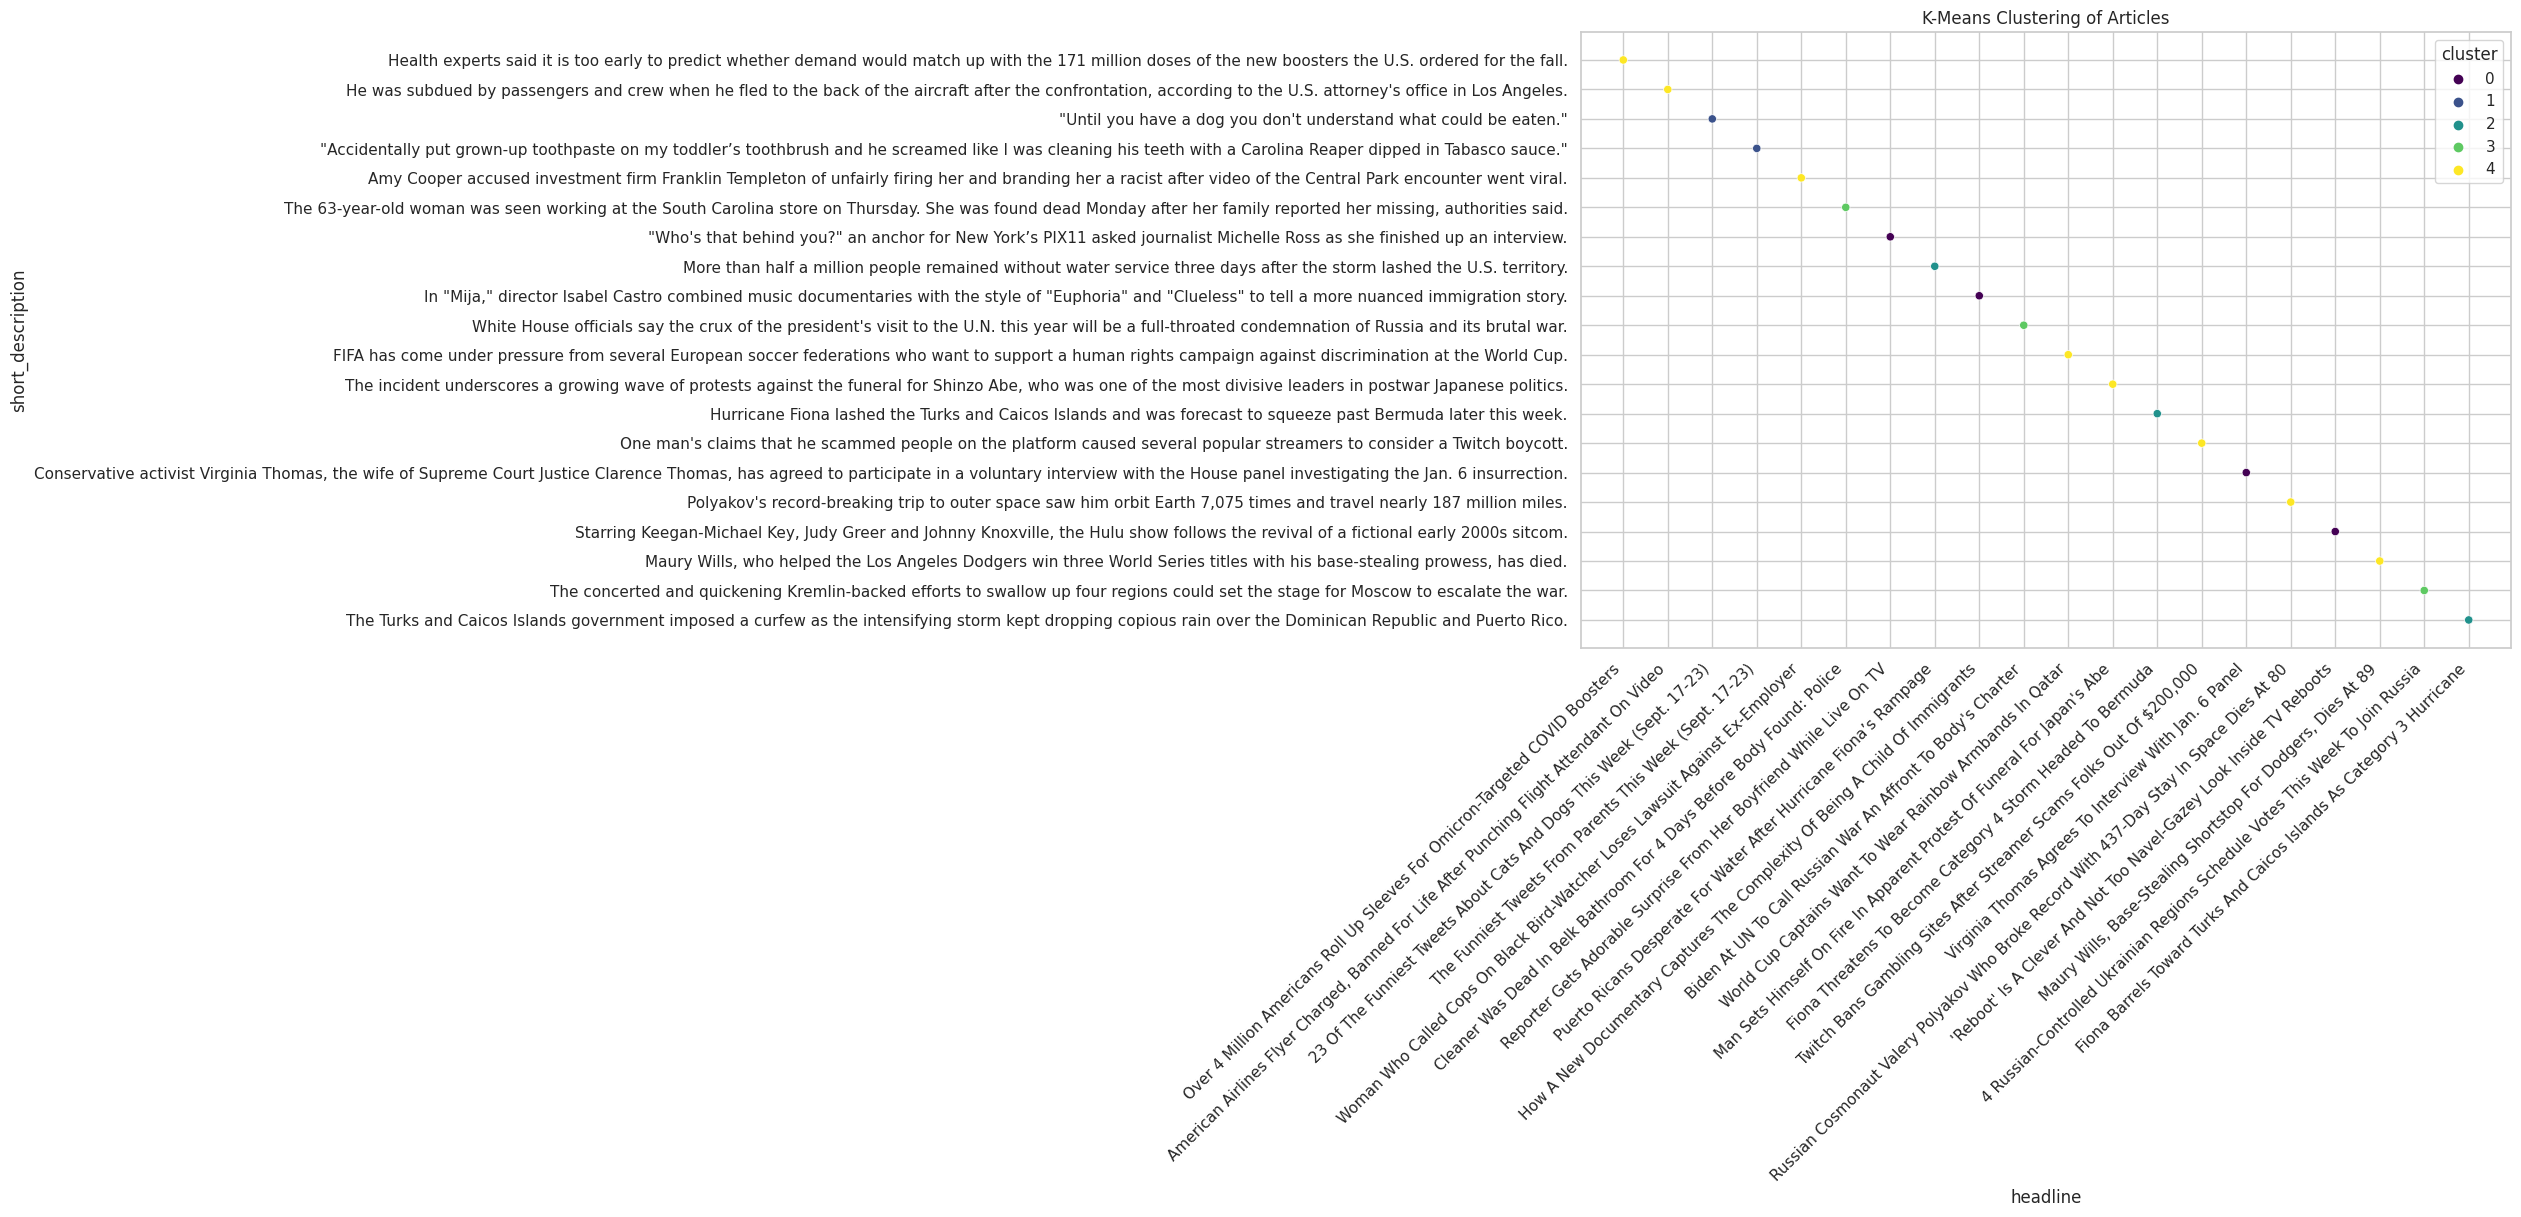

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Combine headline and short_description into a single text column
data_df = pd.DataFrame(data_list[:20])
data_df['text'] = data_df['headline'] + ' ' + data_df['short_description']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data_df['text'])

# Apply K-Means clustering
num_clusters = 5 # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Visualize the clusters
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='headline', y='short_description', hue='cluster', palette='viridis', data=data_df, legend='full')

plt.xticks(rotation=45, ha='right')
plt.title('K-Means Clustering of Articles')
plt.show()


Hierarchical Clustering:
The linkage matrix is calculated using the hierarchical clustering method 'ward'.
The linkage() function from scipy.cluster.hierarchy is used.

Plot Dendrogram:
The dendrogram is plotted using the dendrogram() function.
The labels for each leaf in the dendrogram are set to the 'headline' column of the DataFrame.
The orientation is set to 'right', and leaf_font_size and color_threshold parameters are adjusted for better readability.

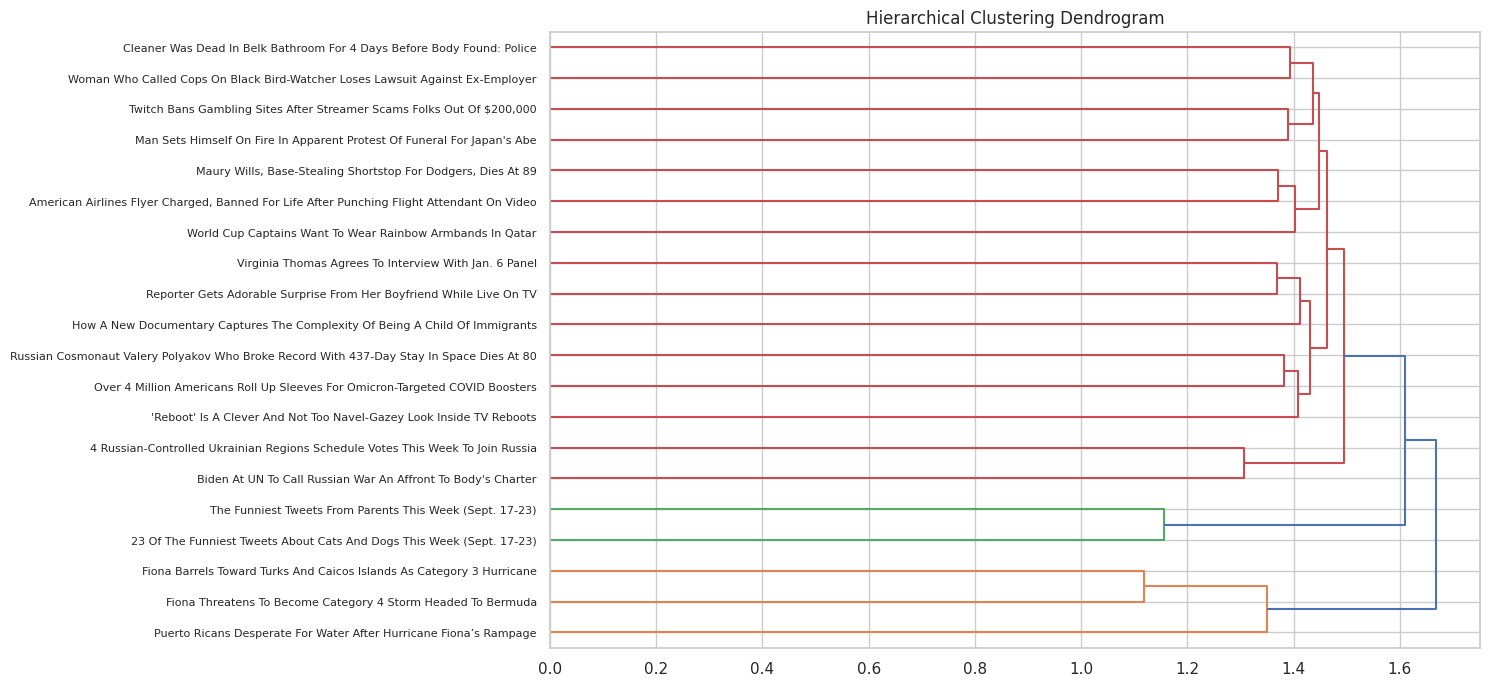

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Combine headline and short_description into a single text column
data_df = pd.DataFrame(data_list[:20])
data_df['text'] = data_df['headline'] + ' ' + data_df['short_description']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data_df['text'])

# Calculate linkage matrix for hierarchical clustering
linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data_df['headline'].tolist(), orientation='right', leaf_font_size=8, color_threshold=1.5)

plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Import Libraries:
Import necessary libraries, including networkx for creating graphs and matplotlib for visualization.
Import spacy for natural language processing.

Load spaCy Model:
Load the spaCy English language model (en_core_web_sm).

Create a Directed Graph:
Initialize a directed graph using NetworkX (G = nx.DiGraph()).

Process Each Article:
Iterate over the first 10 articles in your dataset (data_list[:10]).

NLP Processing for Headline and Short Description:
Use spaCy to process the headline and short description of each article (nlp(article['headline']), nlp(article['short_description'])).

Extract Named Entities:
Extract named entities from both the headline and short description ([ent.text for ent in doc_headline.ents], [ent.text for ent in doc_short_description.ents]).

Add Nodes to the Graph:
Add nodes to the graph for each named entity, specifying the entity type as 'Entity' (G.add_node(entity, entity_type='Entity')).

Add Edges to the Graph:
Add directed edges between entities in the headline and short description, indicating a relationship with the label 'RELATED' (G.add_edge(entity_h, entity_sd, relationship='RELATED')).

Visualization:
Visualize the graph using a spring layout (pos = nx.spring_layout(G)).
Draw nodes, labels, and edges using nx.draw() and customize the appearance.
Display the graph using plt.show().

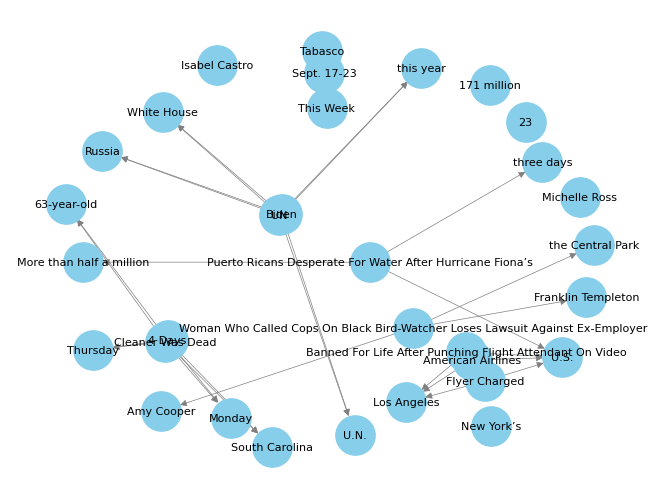

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import spacy
from spacy.matcher import Matcher

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for article in data_list[:10]:
    doc_headline = nlp(article['headline'])
    doc_short_description = nlp(article['short_description'])

    # Extract entities from headlines
    headline_entities = [ent.text for ent in doc_headline.ents]

    # Extract entities from short descriptions
    short_desc_entities = [ent.text for ent in doc_short_description.ents]

    # Add nodes for entities in headlines
    for entity in headline_entities:
        G.add_node(entity, entity_type='Entity')

    # Add nodes for entities in short descriptions
    for entity in short_desc_entities:
        G.add_node(entity, entity_type='Entity')

    # Add edges between entities in headlines and short descriptions
    for entity_h in headline_entities:
        for entity_sd in short_desc_entities:
            G.add_edge(entity_h, entity_sd, relationship='RELATED')

graph=G
# Visualize the graph (optional)
pos = nx.spring_layout(G)  # or choose another layout
nx.draw(graph, pos, with_labels=True, font_size=8, node_size=800, node_color='skyblue', font_color='black', edge_color='gray', width=0.5)
plt.show()


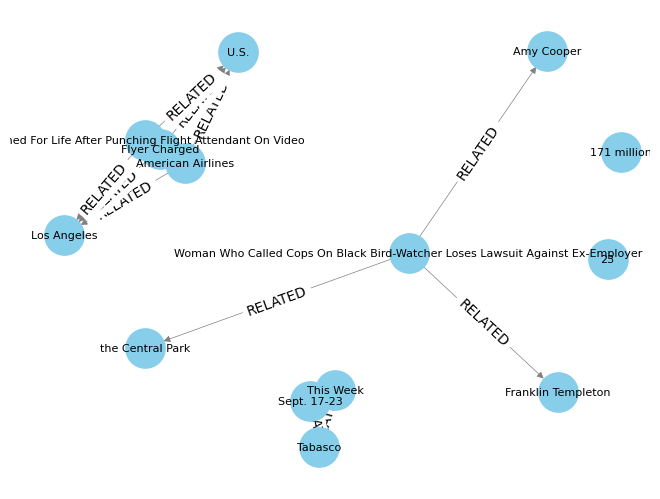

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import spacy

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Create a directed graph
G = nx.DiGraph()


# Add nodes and edges to the graph
for article in data_list[:5]:
    doc_headline = nlp(article['headline'])
    doc_short_description = nlp(article['short_description'])

    # Extract entities from headlines
    headline_entities = [ent.text for ent in doc_headline.ents]

    # Extract entities from short descriptions
    short_desc_entities = [ent.text for ent in doc_short_description.ents]

    # Add nodes for entities in headlines
    for entity in headline_entities:
        G.add_node(entity, entity_type='Entity')

    # Add nodes for entities in short descriptions
    for entity in short_desc_entities:
        G.add_node(entity, entity_type='Entity')

    # Add edges between entities in headlines and short descriptions
    for entity_h in headline_entities:
        for entity_sd in short_desc_entities:
            G.add_edge(entity_h, entity_sd, relationship='RELATED')

# Visualize the graph (optional)
pos = nx.spring_layout(G)  # or choose another layout
edge_labels = {(h, sd): G[h][sd]['relationship'] for h, sd in G.edges}
nx.draw(G, pos, with_labels=True, font_size=8, node_size=800, node_color='skyblue', font_color='black', edge_color='gray', width=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


Import Libraries:
Import necessary libraries, including py2neo for interacting with Neo4j.

Neo4j Connection Details:
Defined the URI, username, and password for connecting to the Neo4j database.

Initialize Neo4j Graph:
Create a Graph object using the connection details (Graph(uri, auth=(username, password))).

Define Save Function:
Created a function named save_to_neo4j that takes the networkx graph (graph) and the Neo4j graph (graph_neo4j) as parameters.

Transaction Handling:
Started a new transaction (tx = graph_neo4j.begin()).

Node Creation:
Iterated over the nodes in the networkx graph.
Created a corresponding Node in Neo4j for each node in the networkx graph, setting the label as "Entity" and the property "name" with the node name.
Stored the created nodes in a dictionary (node_dict).

Relationship Creation:
Iterated over the edges in the networkx graph.
Create a Relationship between the corresponding nodes in Neo4j, connecting them with the label "RELATED_TO."

Commit Transaction:
Committed the transaction to apply the changes to the Neo4j database (tx.commit()).

Print Confirmation:
Printed a message indicating that the graph has been saved to Neo4j.

Function Call:
Called the save_to_neo4j function with the networkx graph (G) and the Neo4j graph (graph_neo4j).

In [8]:
from py2neo import Graph, Node, Relationship

# Save the graph to Neo4j
uri = "neo4j+s://f1fd799a.databases.neo4j.io"
username = "neo4j"
password = "pHwgESd35O_l3w5OblZmMGLpT19NREgz3K_DNUVdvdY"
graph_neo4j = Graph(uri, auth=(username, password))

def save_to_neo4j(graph, graph_neo4j):
    nodes = list(graph.nodes())
    edges = list(graph.edges())
    tx = graph_neo4j.begin()

    node_dict = {}
    for node in nodes:
        node_dict[node] = Node("Entity", name=node)
        tx.create(node_dict[node])

    for edge in edges:
        start_node, end_node = edge
        relationship = Relationship(node_dict[start_node], "RELATED_TO", node_dict[end_node])
        tx.create(relationship)

    tx.commit()
    print("Graph saved to Neo4j.")

# Save the graph to Neo4j
save_to_neo4j(G, graph_neo4j)

Graph saved to Neo4j.


<ipython-input-8-f2a7f53fb698>:24: DeprecationWarning: The transaction.commit() method is deprecated, use graph.commit(transaction) instead
  tx.commit()
